In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'H:\data analysis\Kaggle\Churn Dataset.csv')

In [3]:
df.head(5)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [4]:
df.Churn.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [5]:
483/2850

0.1694736842105263

#### highly imbalanced data

### performing EDA

In [6]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


* The mean churn rate is approximately 14.49%, indicating that about 14.49% of customers in the dataset have churned.
* The average account tenure is around 101 weeks, with a standard deviation of approximately 39.82 weeks. This suggests that there is variability in how long customers stay with the service.
* About 90.31% of customers have renewed their contracts.
* On average, around 27.66% of customers have a data plan, and the average data usage is approximately 0.82 units. This indicates that data plans are somewhat popular among customers, and on average, customers are using data services.
* On average, customers make about 1.56 customer service calls. This could suggest that customers might be experiencing issues or have inquiries about their service.
* Customers, on average, use about 179.78 daytime minutes and make approximately 100.44 daytime calls.
* The average monthly charge is approximately $56.31, with an average overage fee of around $10.05. This suggests that customers are paying additional fees beyond their base monthly charges, possibly due to exceeding limits or additional services.
* On average, customers use approximately 10.24 roaming minutes.

These insights provide a basic understanding of customer behavior and characteristics within the dataset, which can be further analyzed to identify patterns and make strategic decisions to reduce churn and improve customer satisfaction.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


### all values are numerical but they will need to be normalised

In [8]:
df.shape

(3333, 11)

In [9]:
df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [10]:
df.corr()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Churn,1.000000,0.016541,-0.259852,-0.102148,-0.087195,0.208750,0.205151,0.018459,0.072313,0.092812,0.068239
AccountWeeks,0.016541,1.000000,-0.024735,0.002918,0.014391,-0.003796,0.006216,0.038470,0.012581,-0.006749,0.009514
ContractRenewal,-0.259852,-0.024735,1.000000,-0.006006,-0.019223,0.024522,-0.049396,-0.003755,-0.047291,-0.019105,-0.045871
DataPlan,-0.102148,0.002918,-0.006006,1.000000,0.945982,-0.017824,-0.001684,-0.011086,0.737490,0.021526,-0.001318
DataUsage,-0.087195,0.014391,-0.019223,0.945982,1.000000,-0.021723,0.003176,-0.007962,0.781660,0.019637,0.162746
CustServCalls,0.208750,-0.003796,0.024522,-0.017824,-0.021723,1.000000,-0.013423,-0.018942,-0.028017,-0.012964,-0.009640
DayMins,0.205151,0.006216,-0.049396,-0.001684,0.003176,-0.013423,1.000000,0.006750,0.567968,0.007038,-0.010155
DayCalls,0.018459,0.038470,-0.003755,-0.011086,-0.007962,-0.018942,0.006750,1.000000,-0.007963,-0.021449,0.021565
MonthlyCharge,0.072313,0.012581,-0.047291,0.737490,0.781660,-0.028017,0.567968,-0.007963,1.000000,0.281766,0.117433
OverageFee,0.092812,-0.006749,-0.019105,0.021526,0.019637,-0.012964,0.007038,-0.021449,0.281766,1.000000,-0.011023


In [11]:
df.cov()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Churn,0.123951,0.231902,-0.027069,-0.016090,-0.039069,0.096681,3.934012,0.130427,0.418190,0.082858,0.067073
AccountWeeks,0.231902,1585.800121,-0.291437,0.051995,0.729328,-0.198853,13.482587,30.744868,8.229257,-0.681543,1.057726
ContractRenewal,-0.027069,-0.291437,0.087544,-0.000795,-0.007239,0.009545,-0.796051,-0.022295,-0.229842,-0.014334,-0.037891
DataPlan,-0.016090,0.051995,-0.000795,0.200165,0.538632,-0.010490,-0.041038,-0.099539,5.419791,0.024420,-0.001646
DataUsage,-0.039069,0.729328,-0.007239,0.538632,1.619684,-0.036367,0.220153,-0.203362,16.340522,0.063372,0.578249
CustServCalls,0.096681,-0.198853,0.009545,-0.010490,-0.036367,1.730517,-0.961790,-0.500080,-0.605396,-0.043245,-0.035403
DayMins,3.934012,13.482587,-0.796051,-0.041038,0.220153,-0.961790,2966.696487,7.378949,508.151281,0.972073,-1.544149
DayCalls,0.130427,30.744868,-0.022295,-0.099539,-0.203362,-0.500080,7.378949,402.768141,-2.625118,-1.091507,1.208268
MonthlyCharge,0.418190,8.229257,-0.229842,5.419791,16.340522,-0.605396,508.151281,-2.625118,269.814517,11.736030,5.385324
OverageFee,0.082858,-0.681543,-0.014334,0.024420,0.063372,-0.043245,0.972073,-1.091507,11.736030,6.429835,-0.078038


<AxesSubplot: >

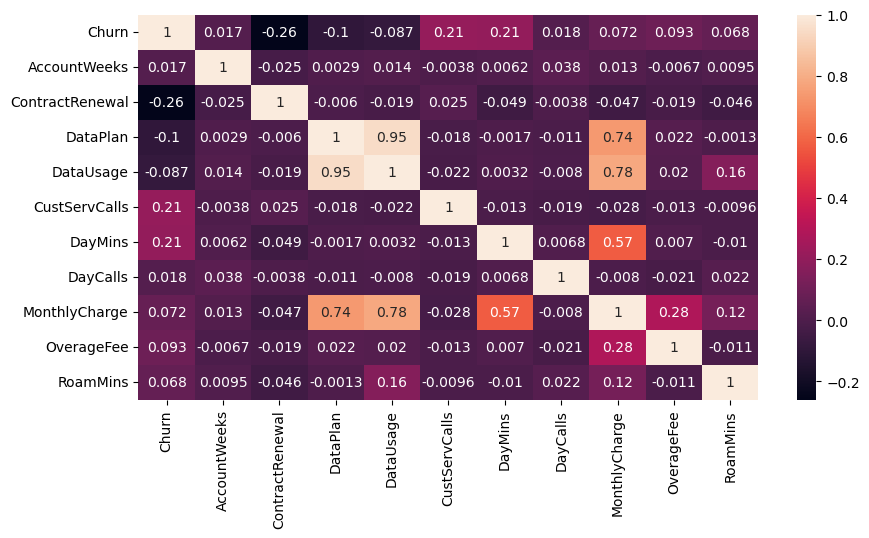

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

ContractRenewal negatively correlates with churn: Customers with renewed contracts are less likely to churn.
DataPlan and DataUsage have a strong positive correlation: Customers with a data plan tend to use more data.
MonthlyCharge positively correlates with DataUsage: Higher monthly charges are associated with increased data usage.
CustServCalls positively correlates with churn: Higher customer service calls may indicate dissatisfaction and higher likelihood of churn.

### No missing values , the dataset seems to be clean

<AxesSubplot: xlabel='Churn', ylabel='count'>

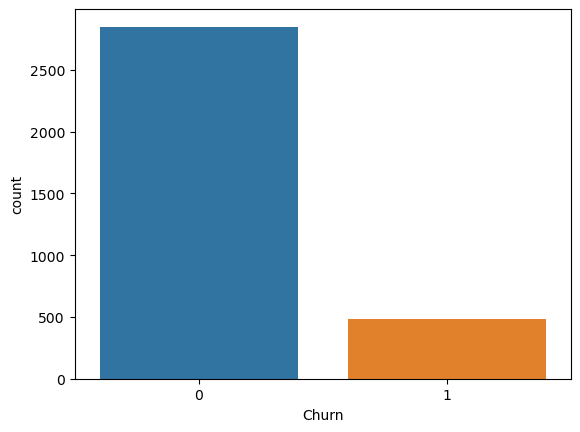

In [13]:
sns.countplot(x=df.Churn,data=df)

<AxesSubplot: xlabel='Churn', ylabel='Density'>

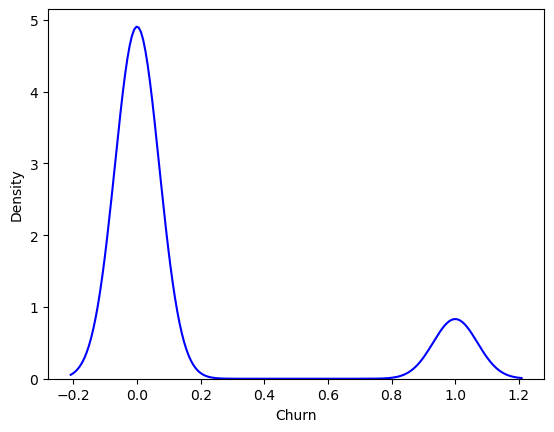

In [14]:
sns.kdeplot(df.Churn, color="blue")

<AxesSubplot: xlabel='ContractRenewal', ylabel='count'>

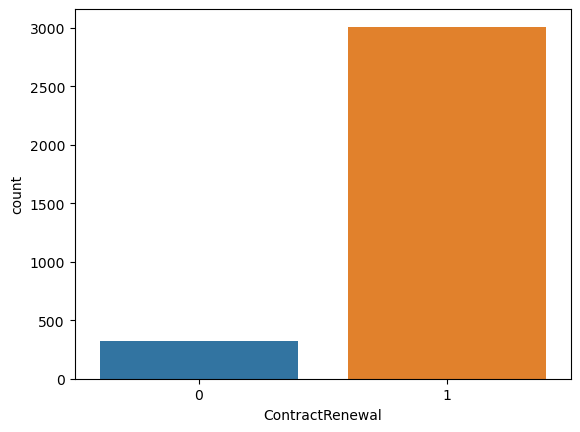

In [15]:
sns.countplot(x=df.ContractRenewal,data=df)

<AxesSubplot: xlabel='ContractRenewal', ylabel='Density'>

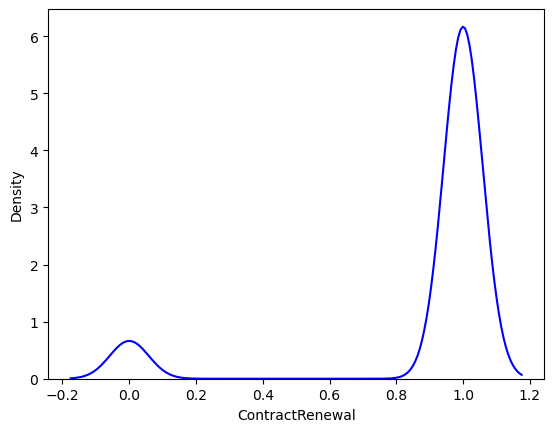

In [16]:
sns.kdeplot(df.ContractRenewal, color="blue")

we can see that number of customers who renewed the contract are more than who did not renewed their contract.

<AxesSubplot: xlabel='DataPlan', ylabel='count'>

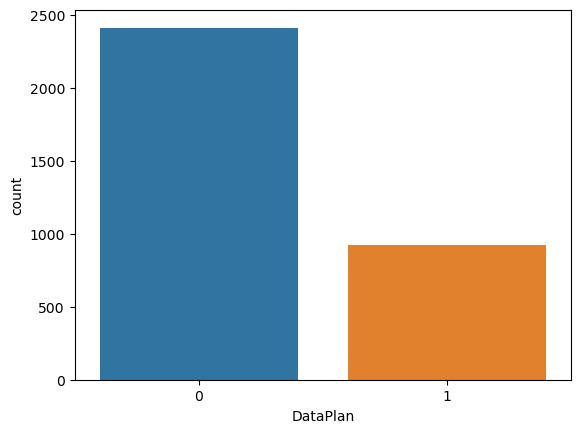

In [17]:
sns.countplot(x=df.DataPlan,data=df)

<AxesSubplot: xlabel='DataPlan', ylabel='Density'>

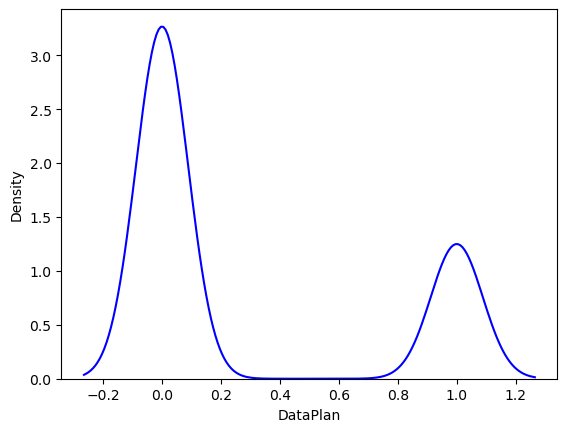

In [18]:
sns.kdeplot(df.DataPlan, color="blue")

<AxesSubplot: xlabel='CustServCalls', ylabel='count'>

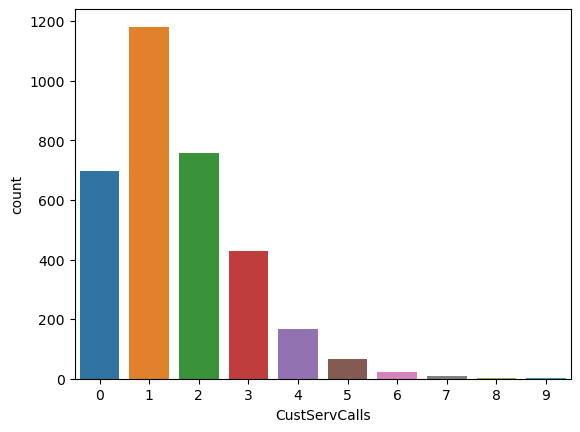

In [19]:
sns.countplot(x=df.CustServCalls,data=df)

<AxesSubplot: xlabel='CustServCalls', ylabel='Density'>

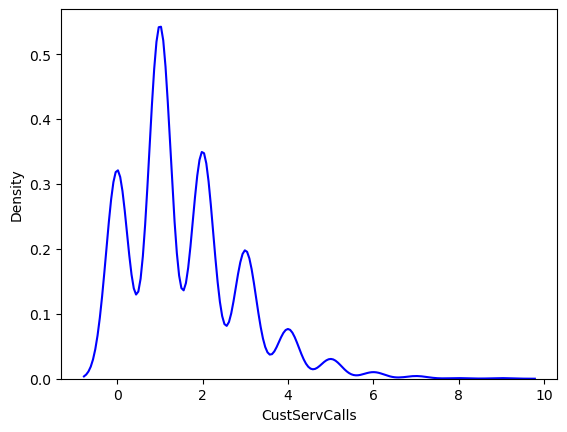

In [20]:
sns.kdeplot(df.CustServCalls, color="blue")

from the above countplot we can see that most pf the customers call them 1 time and some of them call 9 times .

<AxesSubplot: xlabel='DataUsage', ylabel='count'>

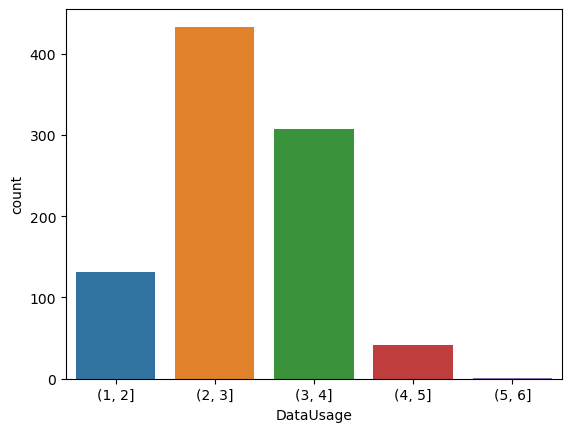

In [21]:
datausage = pd.cut(df.DataUsage,bins=[1,2,3,4,5,6])
sns.countplot(x=datausage,data=df)

<AxesSubplot: xlabel='DataUsage', ylabel='Density'>

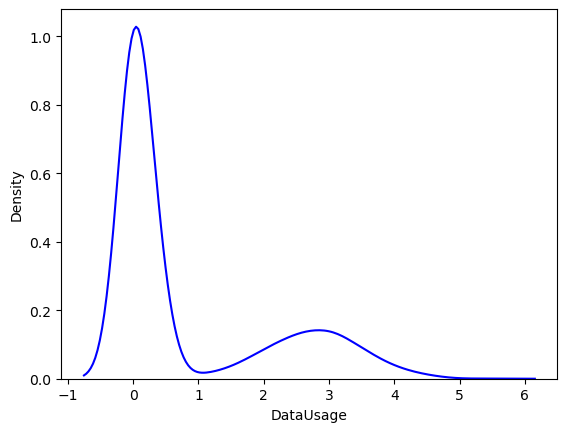

In [22]:
sns.kdeplot(df.DataUsage, color="blue")

from the above countplot we can see that most of the customers use the data between the bin(2,3) less is in (5,6)

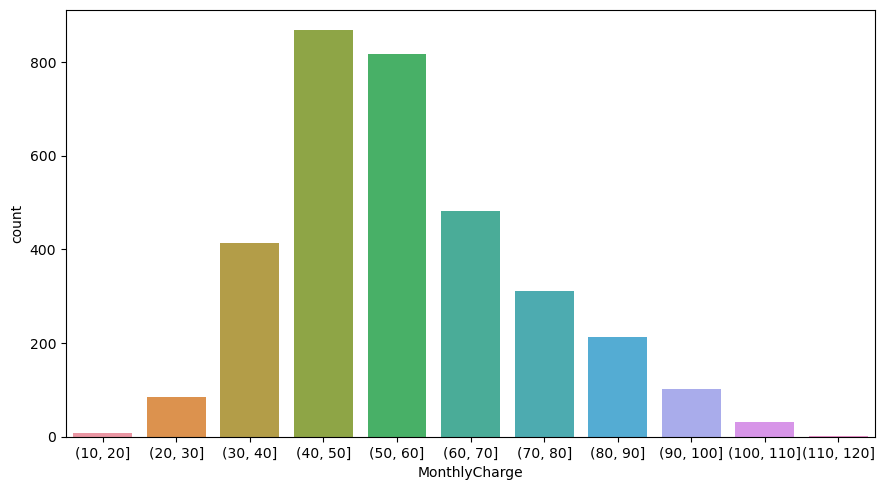

In [23]:
plt.figure(figsize=(9,5))
monthlycharge = pd.cut(df.MonthlyCharge,bins=[10,20,30,40,50,60,70,80,90,100,110,120])
sns.countplot(x=monthlycharge,data=df)
plt.tight_layout()

<AxesSubplot: xlabel='MonthlyCharge', ylabel='Density'>

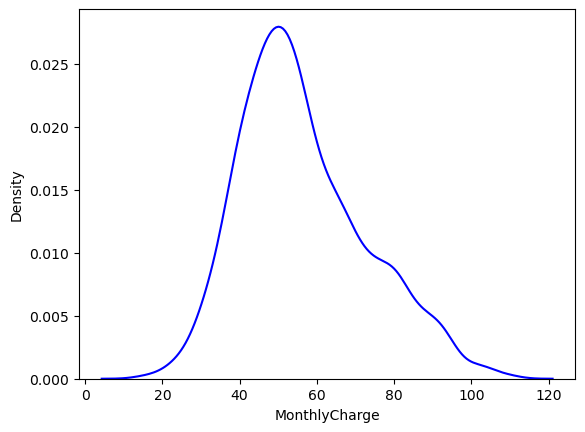

In [24]:
sns.kdeplot(df.MonthlyCharge, color="blue")

we can see that most of the customers are having monthly charges between the 40 and 50 and some of them have between 110 and 120

<AxesSubplot: xlabel='DayMins', ylabel='count'>

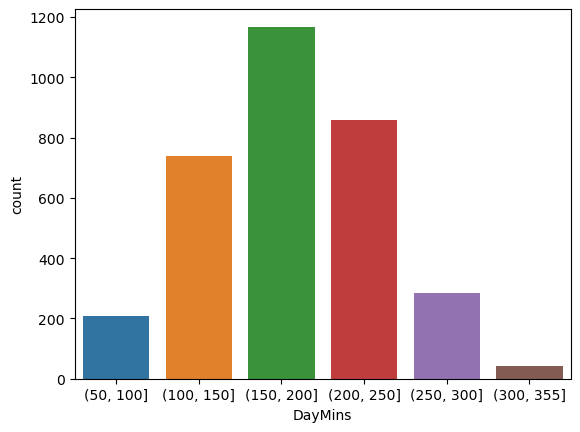

In [25]:
daymins = pd.cut(df.DayMins,bins=[50,100,150,200,250,300,355])
sns.countplot(x=daymins,data=df)

<AxesSubplot: xlabel='DayMins', ylabel='Density'>

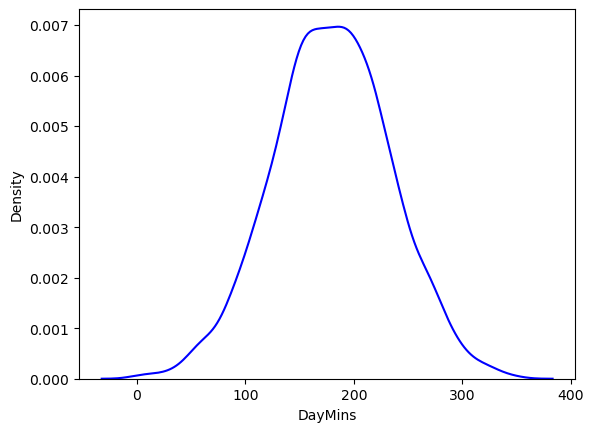

In [26]:
sns.kdeplot(df.DayMins, color="blue")

The most common number of minutes is the range 150-200 with the most records. This can be an indicator of peak demand or busiest times in the study.

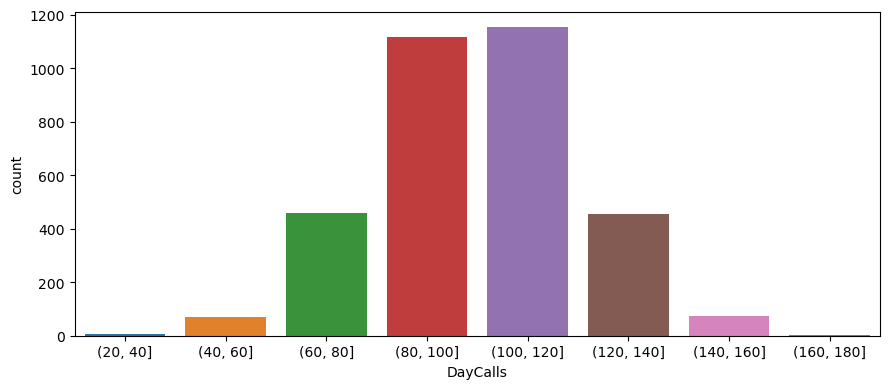

In [27]:
plt.figure(figsize=(9,4))
daycalls = pd.cut(df.DayCalls,bins=[20,40,60,80,100,120,140,160,180])
sns.countplot(x=daycalls,data=df)
plt.tight_layout()

<AxesSubplot: xlabel='DayCalls', ylabel='Density'>

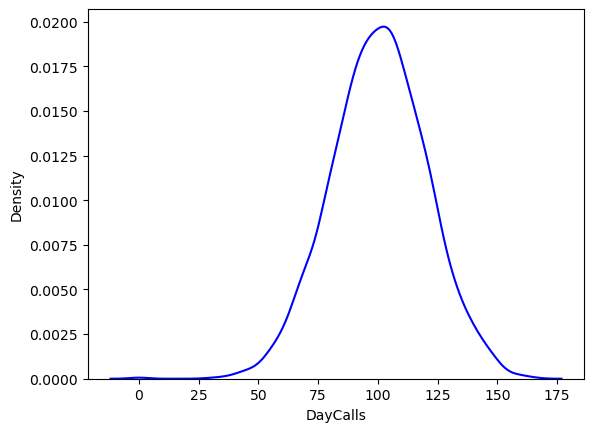

In [28]:
sns.kdeplot(df.DayCalls, color="blue")

the countplot shows that the majority of day calls fall within the range of 100-120, it indicates that most calls made by customers in our dataset were made during this period.

<AxesSubplot: xlabel='AccountWeeks', ylabel='count'>

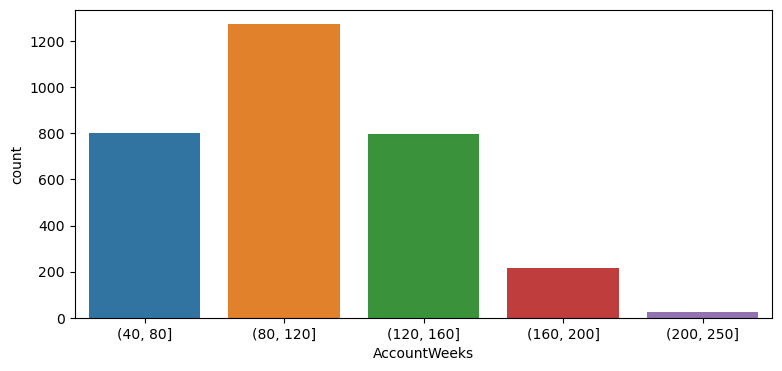

In [29]:
plt.figure(figsize=(9,4))
accountweeks = pd.cut(df.AccountWeeks,bins=[40,80,120,160,200,250])
sns.countplot(x=accountweeks,data=df)

<AxesSubplot: xlabel='AccountWeeks', ylabel='Density'>

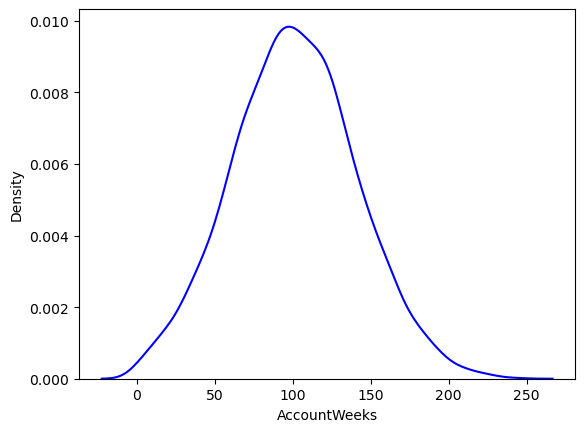

In [30]:
sns.kdeplot(df.AccountWeeks, color="blue")

from the above countplot we can see that number of weeks most customers has had active account are 80-120 and least number of weeks some customers has had their active account are 200-250

<AxesSubplot: xlabel='OverageFee', ylabel='count'>

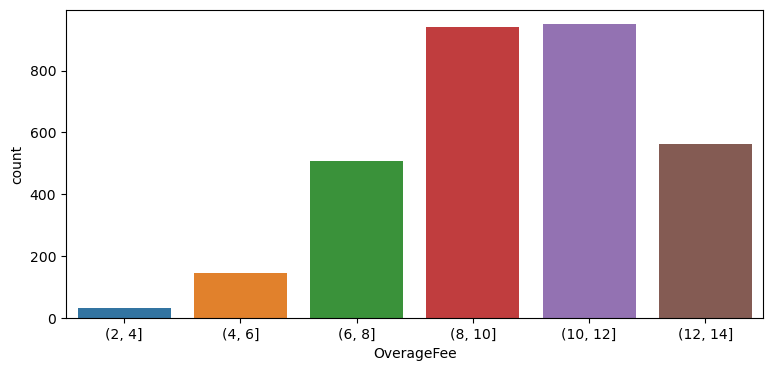

In [31]:
plt.figure(figsize=(9,4))
overagefee = pd.cut(df.OverageFee,bins=[2,4,6,8,10,12,14])
sns.countplot(x=overagefee,data=df)

<AxesSubplot: xlabel='OverageFee', ylabel='Density'>

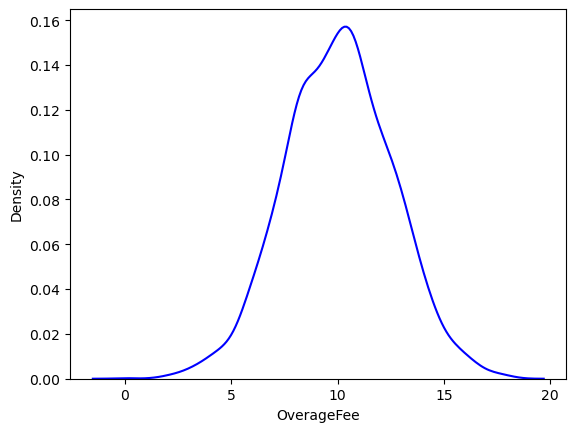

In [32]:
sns.kdeplot(df.OverageFee, color="blue")

### Except a few columns all columns have a normal distribution

## Bivariate Analysis

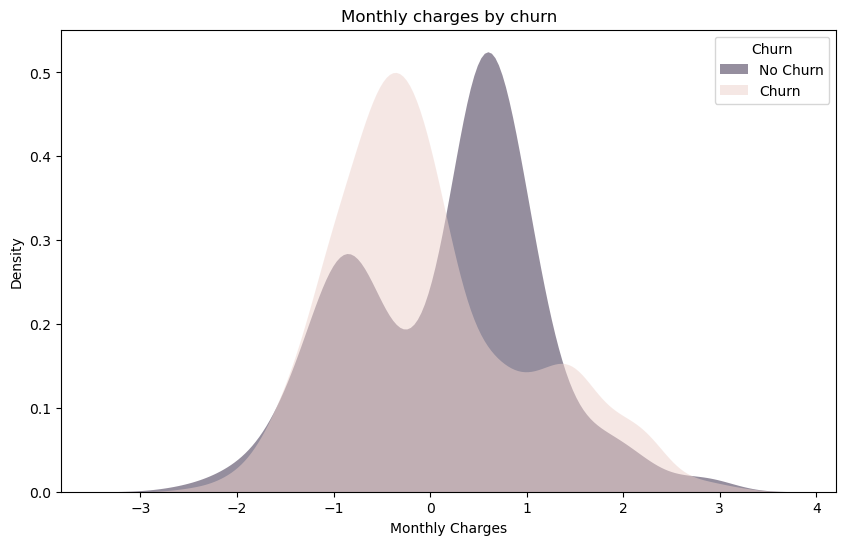

In [92]:
# Churn by Monthly Charges 
plt.figure(figsize=(10,6))

sns.kdeplot(data=df, x="MonthlyCharge", hue="Churn",
            fill=True, common_norm=False, 
            alpha=.5, linewidth=0)

plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.title('Monthly charges by churn')
plt.legend(title='Churn', labels=['No Churn', 'Churn'], loc='upper right')

plt.show()

churn is high when monthly charges are high

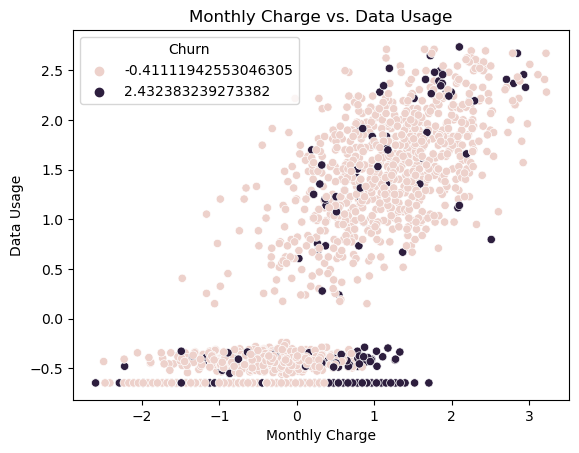

In [93]:
sns.scatterplot(data=df, x='MonthlyCharge', y='DataUsage', hue='Churn')
plt.title('Monthly Charge vs. Data Usage')
plt.xlabel('Monthly Charge')
plt.ylabel('Data Usage')
plt.show()

we can see that the numbers of customers who did not churn according to the data usage and monthly charge are more than the number of customers who churn

KeyboardInterrupt: 

<Figure size 1000x500 with 0 Axes>

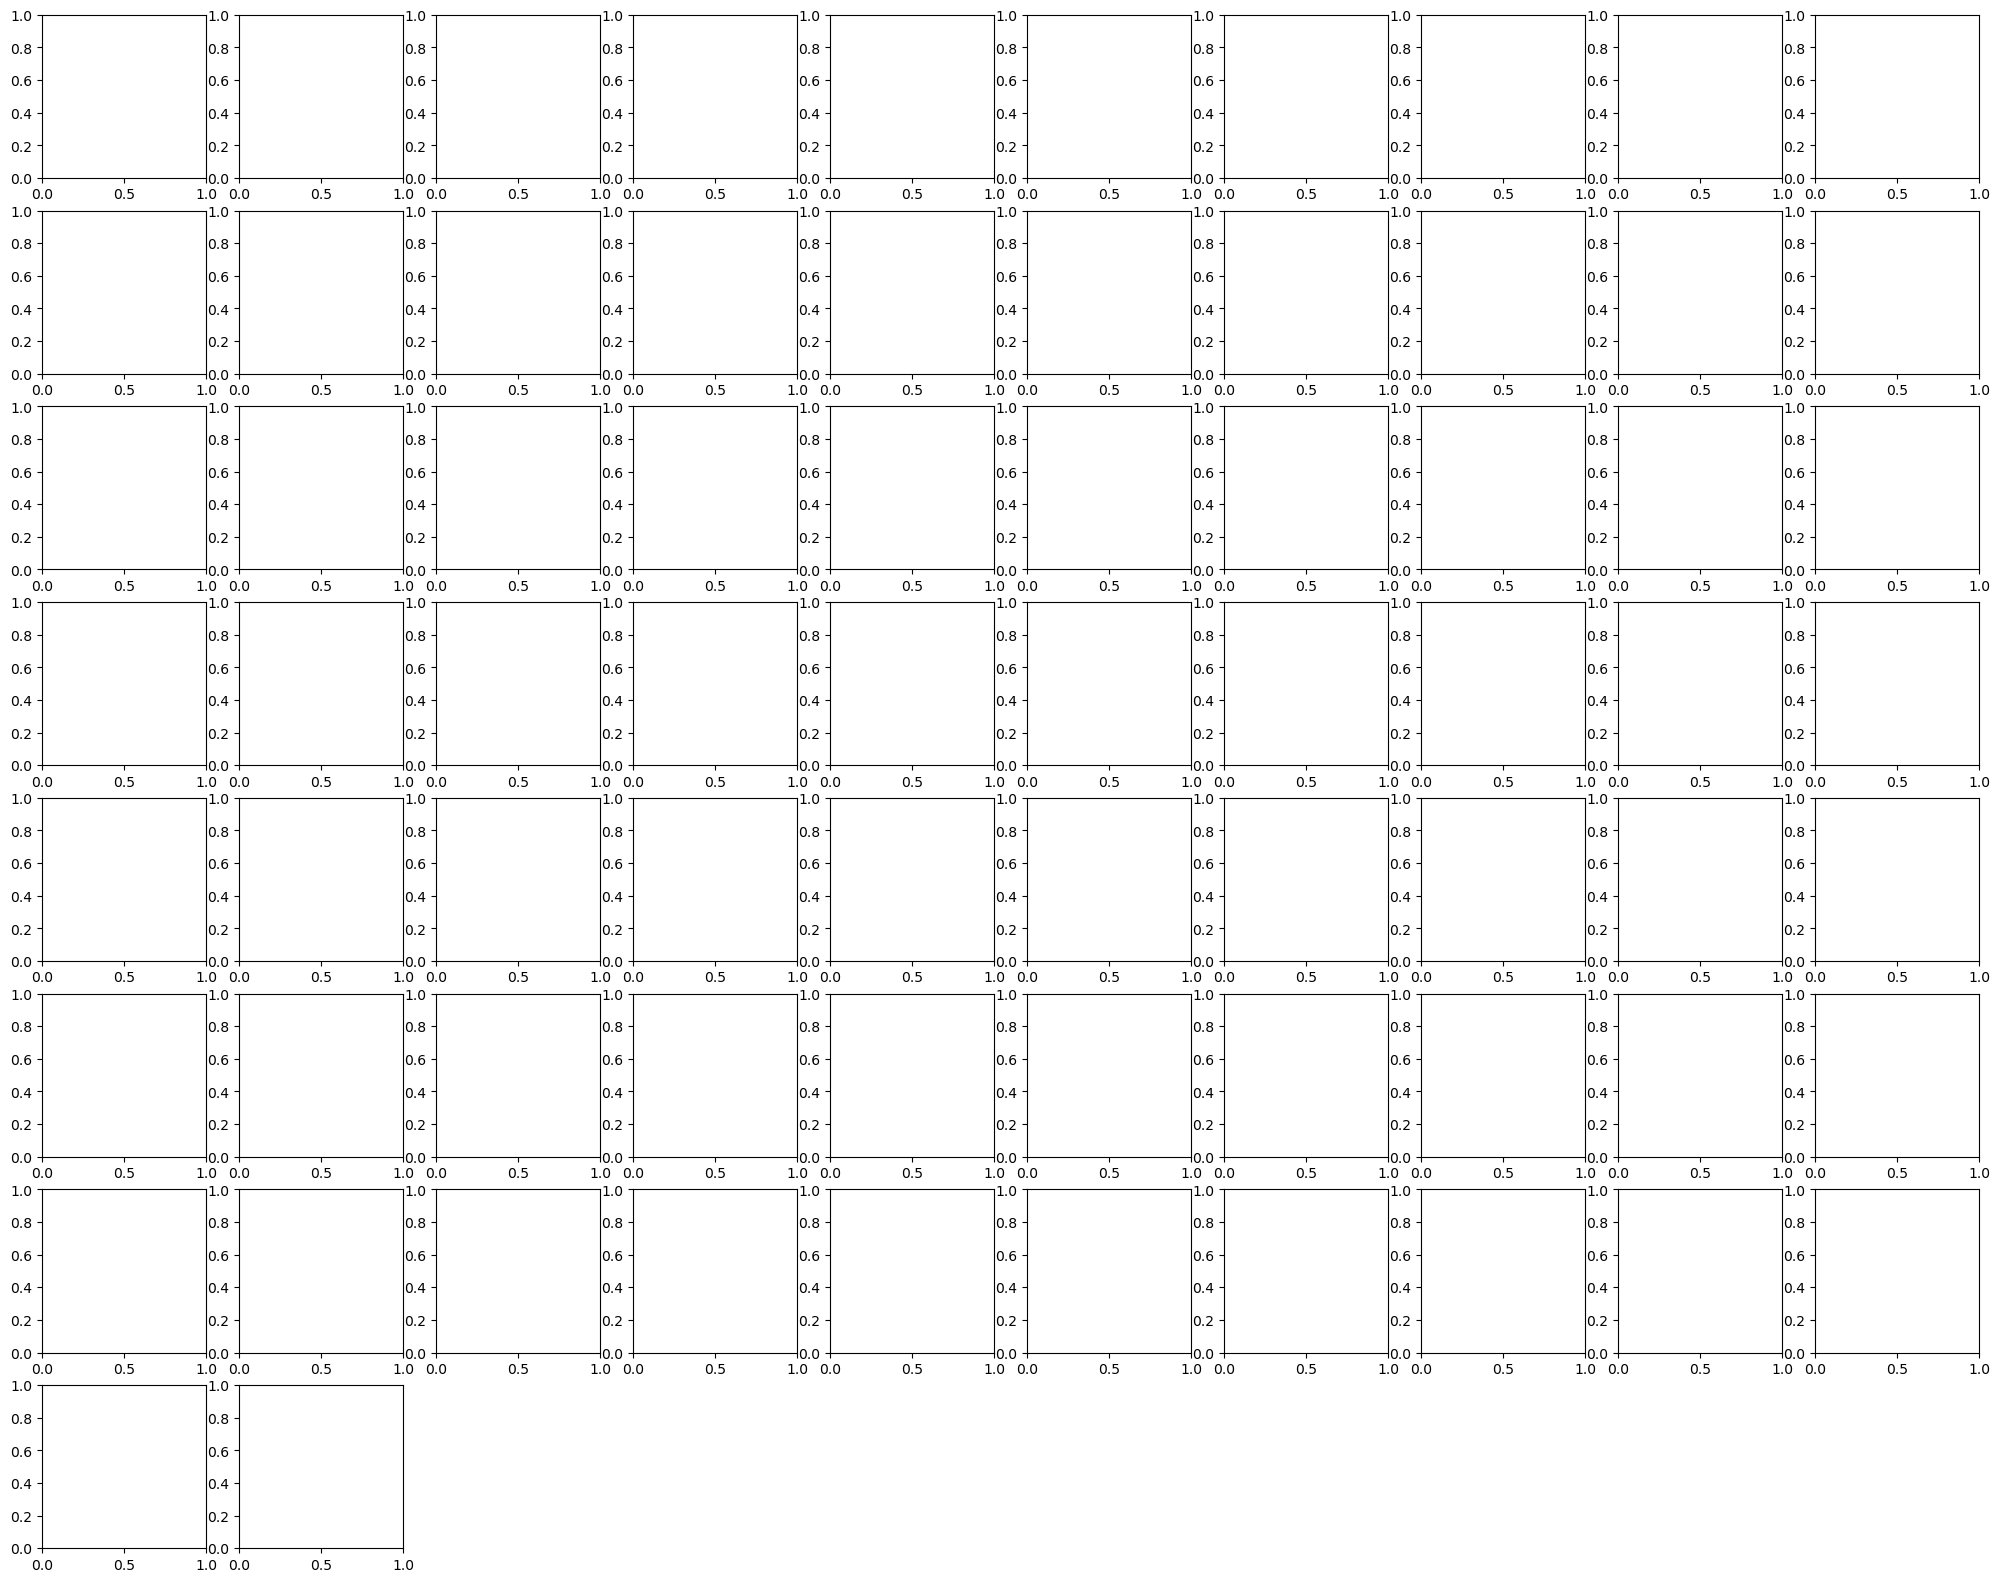

In [94]:
plt.figure(figsize=(10,5))
sns.pairplot(df, hue='Churn', diag_kind='kde')
plt.show()

Churn vs. ContractRenewal: Customers who renewed contracts might have lower churn rates.
Churn vs. DataPlan: Customers with data plans might have lower churn rates due to increased engagement with the service.
Churn vs. DataUsage: Higher data usage might indicate active usage of the service, potentially resulting in lower churn rates.
Churn vs. CustServCalls: Higher churn rates might be associated with more customer service calls, indicating dissatisfaction.
Churn vs. MonthlyCharge: Customers with higher monthly charges might churn more, potentially due to dissatisfaction with pricing.
Churn vs. OverageFee: Higher overage fees might lead to increased churn rates as customers seek more cost-effective options.
Churn vs. DayMins: There could be a relationship between high daytime minutes and churn, possibly indicating dissatisfaction with service quality or usage patterns.

## Doing outlier detection which we missed

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')


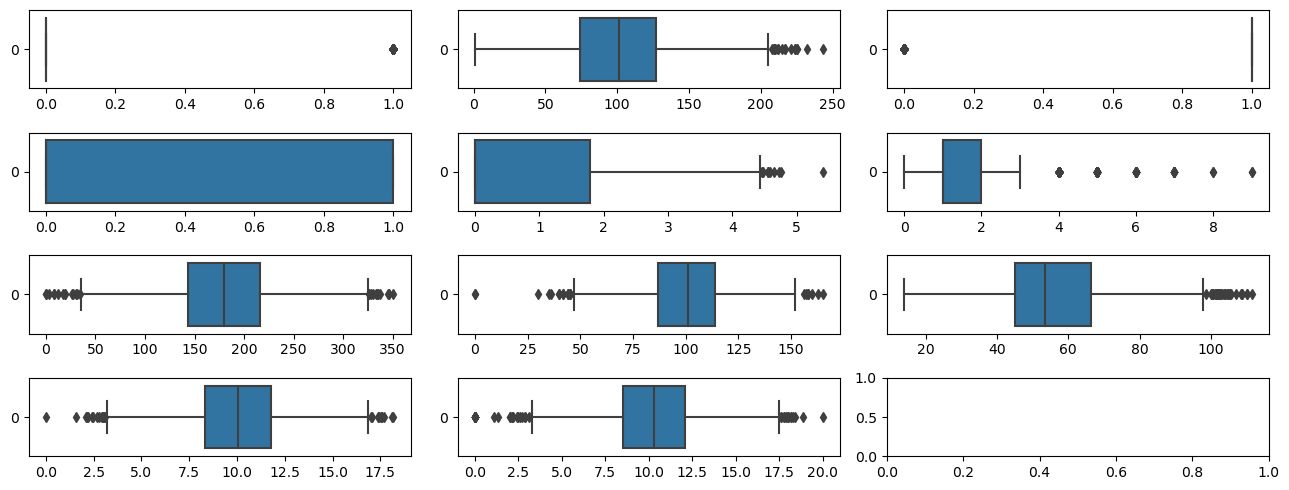

In [36]:
def boxplotting_outliers(data,nrows=1,ncolumns=1):
    fig,axes = plt.subplots(nrows,ncolumns,figsize=(13,5))
    columns_lst = data.columns
    print(columns_lst)
    for i, df in enumerate(columns_lst):
        sns.boxplot(data = data[df], orient='h',ax=axes.flatten()[i])
        plt.tight_layout()
        
boxplotting_outliers(df,nrows=4,ncolumns=3)

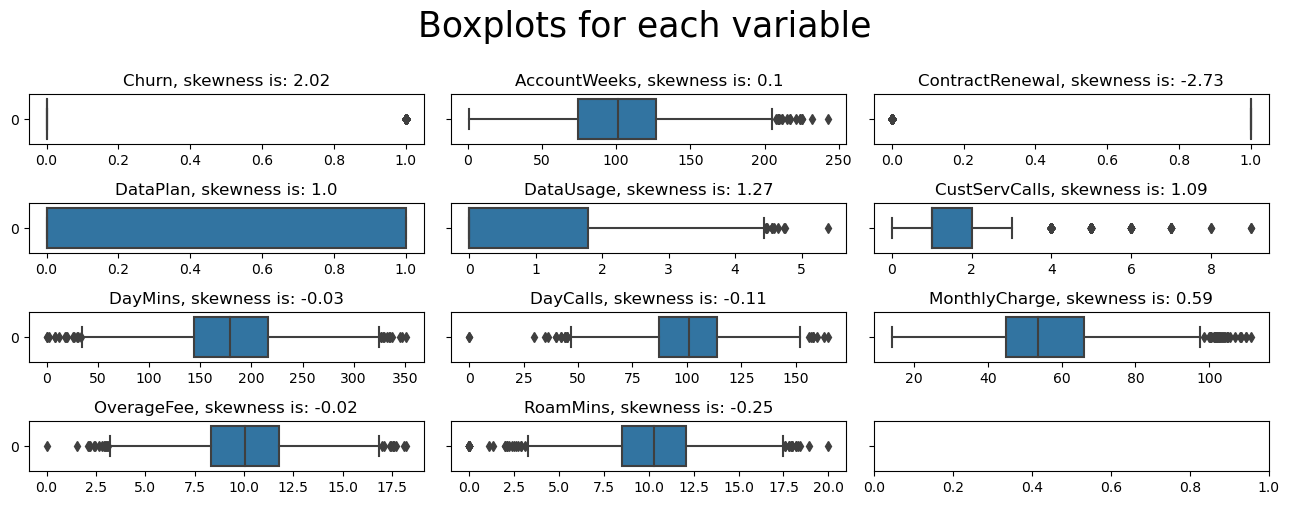

In [37]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(13,5))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=df, columns_list=df.columns, rows=4, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()


### As we can see that there are outliers in almost all the columns, we need to drop these , actually since we skipped this step our models performance was hindered and even with  ensemble learning it was still plateuing around 60% in recall.
### we missed the outlier since data was almost clean and the objectives were focused on model buildings still a huge error on our part, so from here on we will also compare the differences with outlier and without outlier.

In [38]:
for i, cname in enumerate(df.columns):
    Q1 = np.percentile(df[cname],25)
    Q3 = np.percentile(df[cname],75)
    IQR = Q3 - Q1
    outliers  = ( df[cname] < (Q1 - 1.5*IQR) ) | (df[cname] > (Q3 + IQR))
    
print(df[outliers].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 115 to 3319
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            103 non-null    int64  
 1   AccountWeeks     103 non-null    int64  
 2   ContractRenewal  103 non-null    int64  
 3   DataPlan         103 non-null    int64  
 4   DataUsage        103 non-null    float64
 5   CustServCalls    103 non-null    int64  
 6   DayMins          103 non-null    float64
 7   DayCalls         103 non-null    int64  
 8   MonthlyCharge    103 non-null    float64
 9   OverageFee       103 non-null    float64
 10  RoamMins         103 non-null    float64
dtypes: float64(5), int64(6)
memory usage: 9.7 KB
None


### 103 rows will be removed from data as they are outliers which is 0.051% of the data so small values and thus won't affect our data much.

In [39]:
df = df.drop(df[outliers].index)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3230 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3230 non-null   int64  
 1   AccountWeeks     3230 non-null   int64  
 2   ContractRenewal  3230 non-null   int64  
 3   DataPlan         3230 non-null   int64  
 4   DataUsage        3230 non-null   float64
 5   CustServCalls    3230 non-null   int64  
 6   DayMins          3230 non-null   float64
 7   DayCalls         3230 non-null   int64  
 8   MonthlyCharge    3230 non-null   float64
 9   OverageFee       3230 non-null   float64
 10  RoamMins         3230 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 302.8 KB


''' conda install imblearn''''

In [41]:
y = df.Churn
X = df.drop('Churn',axis=1)

In [42]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=1)

In [43]:
print(Xtrain.shape,ytrain.shape,Xtest.shape,ytest.shape)

(2261, 10) (2261,) (969, 10) (969,)


Xtrain.shape: This indicates the shape of our training data features. In this case, we have 2261 samples and 10 features for each sample.
ytrain.shape: This denotes the shape of our training data labels or target variable. we have 2261 labels corresponding to our training samples. The shape here indicates that this is a one-dimensional array.
Xtest.shape: This represents the shape of our testing data features. we have 969 samples in our testing set, with 10 features for each sample.
ytest.shape: Similar to ytrain.shape, this shows the shape of our testing data labels or target variable. we have 969 labels corresponding to our testing samples.

In [44]:
ytrain.value_counts()

0    1947
1     314
Name: Churn, dtype: int64

In [45]:
ytest.value_counts()

0    816
1    153
Name: Churn, dtype: int64

### using smote to balance the data before training

In [46]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
for i in df.columns:
    df[i] = scl.fit_transform(df[i].values.reshape(-1,1))

In [47]:
df.describe().round(2)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3230.00,3230.00,3230.00,3230.00,3230.00,3230.00,3230.00,3230.00,3230.00,3230.00,3230.00
mean,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.41,-2.51,-3.06,-0.62,-0.65,-1.19,-3.30,-5.00,-2.60,-3.97,-2.76
25%,-0.41,-0.68,0.33,-0.62,-0.65,-0.43,-0.66,-0.67,-0.69,-0.68,-0.68
50%,-0.41,0.00,0.33,-0.62,-0.65,-0.43,-0.01,0.03,-0.16,0.01,0.03
75%,-0.41,0.65,0.33,1.62,0.80,0.33,0.67,0.68,0.62,0.68,0.73
max,2.43,3.56,0.33,1.62,2.73,5.64,3.14,3.22,3.23,3.17,2.21


In [48]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=100)

In [49]:
Xtrainupdt,ytrainupdt = sm.fit_resample(Xtrain,ytrain)

In [50]:
print(Xtrainupdt.shape,ytrainupdt.shape)

(3894, 10) (3894,)


- Xtrainupdt.shape: After applying SMOTE, your training data features have been augmented. The shape (3990, 10) indicates that you now have 3990 samples, each with 10 features. This means SMOTE has generated synthetic samples to balance the classes.
- ytrainupdt.shape: Similarly, the shape (3990,) indicates that the number of labels or target variables has increased to 3990. This suggests that SMOTE has balanced the classes by generating additional samples for the minority class.
- Addressing Class Imbalance: The fact that the number of samples in the training set has increased from 2333 to 3990 indicates that our original dataset was imbalanced, with fewer samples in one or more classes. SMOTE has addressed this imbalance by generating synthetic samples for the minority class(es).
- Improved Model Training: By balancing the classes in the training set, we are likely to get more reliable model performance, especially if our original dataset had severe class imbalance. Models trained on imbalanced datasets tend to favor the majority class, leading to poor performance on minority classes. SMOTE helps mitigate this issue.

In [51]:
ytrainupdt.value_counts()

0    1947
1    1947
Name: Churn, dtype: int64

In [97]:
from sklearn.linear_model  import LogisticRegression

lr = LogisticRegression()

model = lr.fit(Xtrainupdt,ytrainupdt)
pred = model.predict(Xtest)

#also checking without SMOTE
lr1 = LogisticRegression()
mdl = lr1.fit(Xtrain,ytrain)
prd = mdl.predict(Xtest)


# Print beta coefficients
print("Beta Coefficients:", model.coef_[0])

# Calculate p-values (assuming you have defined a function 'calculate_p_value')
# p_values = calculate_p_value(X, y, model.coef_)

# Example function to calculate p-values
def calculate_p_value(X, y, coef):
    from scipy import stats
    n = len(y)
    k = len(coef)
    dof = n - k
    y_pred = model.predict(X)
    resid = y - y_pred
    var_resid = np.sum(resid ** 2) / dof
    se = np.array([np.sqrt(var_resid * np.linalg.inv(np.dot(X.T, X))[i, i]) for i in range(k)])
    t = coef / se
    p_values = (1 - stats.norm.cdf(abs(t))) * 2
    return p_values

p_values = calculate_p_value(X, y, model.coef_[0])
print("P-values:", p_values)

Beta Coefficients: [ 3.81406002e-04 -2.90930639e+00 -1.59291372e+00 -1.37264118e-02
  5.24071829e-01  9.95502566e-03 -7.02470379e-03  7.13796741e-04
  1.37802544e-01  2.70899523e-02]
P-values: [5.98385832e-02 0.00000000e+00 0.00000000e+00 9.61643949e-01
 0.00000000e+00 4.06249860e-02 0.00000000e+00 9.80046090e-01
 4.80751095e-03 2.22044605e-15]


In [53]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred))
print(classification_report(ytest,prd))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85       816
           1       0.38      0.71      0.49       153

    accuracy                           0.77       969
   macro avg       0.66      0.75      0.67       969
weighted avg       0.85      0.77      0.79       969

              precision    recall  f1-score   support

           0       0.86      0.98      0.91       816
           1       0.50      0.12      0.20       153

    accuracy                           0.84       969
   macro avg       0.68      0.55      0.56       969
weighted avg       0.80      0.84      0.80       969



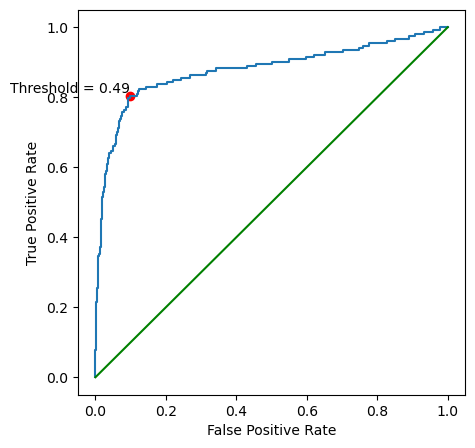

In [106]:
# Define a function to plot the AUC-ROC curve and highlight false negatives
def plot_auc_roc_curve_with_fn(ytest, pred):
    # Compute false positive rate (fpr), true positive rate (tpr), and thresholds
    fpr, tpr, thresholds = roc_curve(ytest, pred)
    
    # Find the threshold that minimizes false negatives
    min_fn_threshold = thresholds[np.argmax(tpr - fpr)]
    
    # Plot the ROC curve
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    
    # Set the size of the figure
    roc_display.figure_.set_size_inches(5, 5)
    
    # Plot the diagonal line (y=x) for reference
    plt.plot([0, 1], [0, 1], color='green')
    
    # Highlight the threshold for minimizing false negatives
    plt.scatter(fpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)], color='red')
    plt.text(fpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)], f'Threshold = {min_fn_threshold:.2f}', verticalalignment='bottom', horizontalalignment='right')

# Call the function to plot the AUC-ROC curve and highlight false negatives
plot_auc_roc_curve_with_fn(ytest, y_proba[:, 1])


- Class Imbalance Impact: Both reports show imbalanced classes, with Class 1 (Positive Class) having significantly fewer samples than Class 0 (Negative Class). In pred, the recall for Class 1 is higher than for Class 0, indicating better performance in identifying positive instances. However, precision is significantly lower, suggesting a higher rate of false positives. In prd, the recall for Class 1 is very low, indicating poor performance in identifying positive instances.
- Overall Model Performance: The model in prd has a higher accuracy (0.85) compared to pred (0.76), primarily due to the high recall for Class 0. However, this accuracy might be misleading, as the model performs poorly in identifying positive instances (low recall for Class 1).
- Precision-Recall Trade-off: In pred, there's a trade-off between precision and recall for Class 1. A higher recall indicates that more positive instances are being captured, but at the cost of precision. In prd, the precision and recall for Class 1 are both low, indicating that the model struggles to correctly identify positive instances without significantly increasing false positives.
- F1-score: F1-score considers both precision and recall, providing a balance between them. In both cases, the F1-score for Class 1 is notably lower, reflecting the challenges in correctly identifying positive instances.

In [54]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,pred))
print(accuracy_score(ytest,prd))

0.7688338493292054
0.8421052631578947


### As we can see that the overall accuracy may have decreased from 84.8% to 75.7% , but the recall value has 
### increased from 12% to overwhelming 77% thus becoming good at identifying the churning customers

### Although the increase in learning is significant but the efficiency is still on lower side about 67%, In next steps we will try building bagging, boosting i.e., ensemble models to bump up these numbers

### Decision trees have been known to have better performance than these (Logistic Regression, Naive Bayes, Perceptron, etc) models being applied independently.

### Followed by Random Forest and other models

!pip install lazypredict

!conda install lazypredict

In [55]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(Xtrainupdt, Xtest, ytrainupdt, ytest)
print(models)

H:\data analysis\Anacoinstaller\INSTALLER\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [00:14<00:00,  1.96it/s]

[LightGBM] [Info] Number of positive: 1947, number of negative: 1947
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1596
[LightGBM] [Info] Number of data points in the train set: 3894, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:18<00:00,  1.53it/s]


                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.89               0.83     0.83      0.89   
NuSVC                              0.85               0.82     0.82      0.86   
ExtraTreesClassifier               0.89               0.81     0.81      0.89   
LGBMClassifier                     0.88               0.81     0.81      0.89   
XGBClassifier                      0.88               0.81     0.81      0.89   
AdaBoostClassifier                 0.86               0.81     0.81      0.86   
SVC                                0.86               0.80     0.80      0.87   
QuadraticDiscriminantAnalysis      0.83               0.80     0.80      0.84   
BaggingClassifier                  0.89               0.79     0.79      0.89   
KNeighborsClassifier               0.82               0.78     0.78      0.84   
ExtraTreeClassifier         

### From above we can see that Random Forest Classifier performs the best overall for this dataset. So, we will RandomForest as our Classifier

In [56]:
help(clf)

Help on LazyClassifier in module lazypredict.Supervised object:

class LazyClassifier(builtins.object)
 |  LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None, predictions=False, random_state=42, classifiers='all')
 |  
 |  This module helps in fitting to all the classification algorithms that are available in Scikit-learn
 |  Parameters
 |  ----------
 |  verbose : int, optional (default=0)
 |      For the liblinear and lbfgs solvers set verbose to any positive
 |      number for verbosity.
 |  ignore_warnings : bool, optional (default=True)
 |      When set to True, the warning related to algorigms that are not able to run are ignored.
 |  custom_metric : function, optional (default=None)
 |      When function is provided, models are evaluated based on the custom evaluation metric provided.
 |  prediction : bool, optional (default=False)
 |      When set to True, the predictions of all the models models are returned as dataframe.
 |  classifiers : list, optional (defau

In [57]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=3, random_state=666,oob_score=1)

RFmodel = clf.fit(Xtrainupdt, ytrainupdt)
RFpred = RFmodel.predict(Xtest)


In [58]:
from sklearn.metrics import accuracy_score

print(accuracy_score(ytrainupdt, RFmodel.predict(Xtrainupdt)))

print(accuracy_score(ytest, RFpred))


0.8697996918335902
0.8627450980392157


In [59]:
from sklearn.metrics import classification_report
print(classification_report(ytest,RFpred))
print(classification_report(ytrainupdt, RFmodel.predict(Xtrainupdt)))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       816
           1       0.54      0.80      0.65       153

    accuracy                           0.86       969
   macro avg       0.75      0.84      0.78       969
weighted avg       0.89      0.86      0.87       969

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1947
           1       0.89      0.85      0.87      1947

    accuracy                           0.87      3894
   macro avg       0.87      0.87      0.87      3894
weighted avg       0.87      0.87      0.87      3894



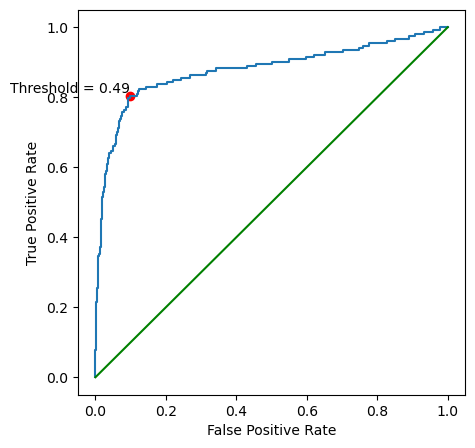

In [108]:
# Define a function to plot the AUC-ROC curve and highlight false negatives
def plot_auc_roc_curve_with_fn(ytest, RFpred):
    # Compute false positive rate (fpr), true positive rate (tpr), and thresholds
    fpr, tpr, thresholds = roc_curve(ytest, RFpred)
    
    # Find the threshold that minimizes false negatives
    min_fn_threshold = thresholds[np.argmax(tpr - fpr)]
    
    # Plot the ROC curve
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    
    # Set the size of the figure
    roc_display.figure_.set_size_inches(5, 5)
    
    # Plot the diagonal line (y=x) for reference
    plt.plot([0, 1], [0, 1], color='green')
    
    # Highlight the threshold for minimizing false negatives
    plt.scatter(fpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)], color='red')
    plt.text(fpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)], f'Threshold = {min_fn_threshold:.2f}', verticalalignment='bottom', horizontalalignment='right')

# Call the function to plot the AUC-ROC curve and highlight false negatives
plot_auc_roc_curve_with_fn(ytest, y_proba[:, 1])


In [118]:
cm = confusion_matrix(ytest, RFpred)
print(cm)

[[713 103]
 [ 30 123]]


In [113]:
import numpy as np

# Get probability predictions
RF_proba = RFmodel.predict_proba(Xtest)[:, 1]  # Assuming you're interested in the probability of the positive class

# Combine probabilities and actual labels
results = np.column_stack((RF_proba, ytest))

# Sort results by predicted probabilities in descending order
sorted_results = results[results[:, 0].argsort()[::-1]]

# Divide sorted probabilities into deciles
deciles = np.array_split(sorted_results, 10)

# Calculate event rate in each decile
for i, decile in enumerate(deciles):
    event_rate = np.mean(decile[:, 1])
    print(f"Decile {i+1} Event Rate: {event_rate:.2%}")


Decile 1 Event Rate: 60.82%
Decile 2 Event Rate: 54.64%
Decile 3 Event Rate: 23.71%
Decile 4 Event Rate: 3.09%
Decile 5 Event Rate: 1.03%
Decile 6 Event Rate: 4.12%
Decile 7 Event Rate: 1.03%
Decile 8 Event Rate: 1.03%
Decile 9 Event Rate: 4.12%
Decile 10 Event Rate: 4.17%


- Precision: The precision score represents the ratio of correctly predicted positive observations to the total predicted positives. For class 0 (e), the precision is high (0.96), indicating that the model performs well in correctly identifying class 0 instances. However, for class 1, the precision is lower (0.54), suggesting that the model has some difficulty in accurately predicting class 1 instances.
- Recall: The recall score represents the ratio of correctly predicted positive observations to the actual positives in the dataset. For class 0 (e), the recall is high (0.87), indicating that the model effectively captures the majority of class 0 instances. For class 1, the recall is higher (0.80), suggesting that the model performs well in identifying class 1 instances, although it misses some.
- F1-score: The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. It gives us an overall measure of a model's accuracy. The F1-score for class 0 (e) is 0.91, indicating a good balance between precision and recall. However, for class 1, the F1-score is lower (0.65), indicating that the model's performance for class 1 is not as balanced.
- Support: The support represents the number of actual occurrences of each class in the dataset. For class 0 (e), the support is 816, while for class 1, the support is 153 in the test dataset. Similarly, in the training dataset, the support for class 0 is 1947, and for class 1, it is also 1947.
- Overall, the RF model shows promising performance, especially for class 0 (e), where it achieves high precision, recall, and F1-score. However, there is room for improvement, particularly in accurately predicting class 1 instances, as indicated by lower precision, recall, and F1-score for class 1.

### With some hyperparameter tuning we are able to get a well optimised model that is perfectly fit for the data.

### we are able to get 80% as our recall value, and not only that the overfitting has also been kept to minimum, which is good for us.

In [62]:
!pip install pydot graphviz

In [63]:
!pip install scikit-plot

In [64]:
## from sklearn.metrics import plot_confusion_matrix, roc_auc_score, plot_roc_curve

In [65]:
### using Stacking for ensemble learning

In [66]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report


In [67]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import CategoricalNB
from sklearn.multioutput import ClassifierChain
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestCentroid
from sklearn.svm import NuSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

from xgboost import XGBClassifier
#from catboost import CatBoostClassifier

In [68]:
estimators = []
estimators.append(('AdaBoostClassifier', AdaBoostClassifier(random_state=13) ))
estimators.append(('Bagging Classifier', BaggingClassifier(random_state=13) ))
estimators.append(('Bernoulli NB', BernoulliNB() ))
estimators.append(('Decision Tree Classifier', DecisionTreeClassifier(random_state=13) ))
estimators.append(('Dummy Classifier', DummyClassifier(random_state=13) ))
estimators.append(('Extra Tree Classifier', ExtraTreeClassifier(random_state=13) ))
estimators.append(('Extra Trees Classifier', ExtraTreesClassifier(random_state=13) ))
estimators.append(('Gaussian NB', GaussianNB() ))
estimators.append(('Gaussian Process Classifier', GaussianProcessClassifier(random_state=13) ))
estimators.append(('Gradient Boosting Classifier', GradientBoostingClassifier(random_state=13) ))
estimators.append(('Hist Gradient Boosting Classifier', HistGradientBoostingClassifier(random_state=13) ))
estimators.append(('KNN', KNeighborsClassifier() ))
#estimators.append(('Label Propagation', LabelPropagation() ))
#estimators.append(('Label Spreading', LabelSpreading() ))
estimators.append(('LogisticRegression', LogisticRegression(max_iter=1000, random_state=13)))
estimators.append(('Logistic Regression CV', LogisticRegressionCV(max_iter=1000, random_state=13) ))
estimators.append(('MLPClassifier', MLPClassifier(max_iter=2000,random_state=13) ))
estimators.append(('Nearest Centroid', NearestCentroid() ))
estimators.append(('Passive Aggressive Classifier', PassiveAggressiveClassifier(random_state=13) ))
estimators.append(('Perceptron', Perceptron(random_state=13) ))
#estimators.append(('RadiusNeighborsClassifier', RadiusNeighborsClassifier(radius=3) ))
estimators.append(('RandomForest', RandomForestClassifier(max_depth= 10, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 170, random_state=13) ))
estimators.append(('Ridge Classifier', RidgeClassifier(random_state=13) ))
estimators.append(('Ridge Classifier CV', RidgeClassifierCV() ))
estimators.append(('SGDClassifier', SGDClassifier(random_state=13) ))
estimators.append(('SVC', SVC(random_state=13)))
estimators.append(('XGB', XGBClassifier(random_state=13) ))

In [69]:
rfc = RandomForestClassifier(max_depth=1, random_state=666,oob_score=1)

### Voting classifier 

In [102]:
voting = VotingClassifier(estimators=estimators)
vote = voting.fit(Xtrainupdt, ytrainupdt)
voted = vote.predict(Xtest)
print(classification_report(ytest,voted))
print(classification_report(ytrainupdt,vote.predict(Xtrainupdt)))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       816
           1       0.62      0.63      0.63       153

    accuracy                           0.88       969
   macro avg       0.78      0.78      0.78       969
weighted avg       0.88      0.88      0.88       969

              precision    recall  f1-score   support

           0       0.87      0.99      0.92      1947
           1       0.99      0.85      0.91      1947

    accuracy                           0.92      3894
   macro avg       0.93      0.92      0.92      3894
weighted avg       0.93      0.92      0.92      3894



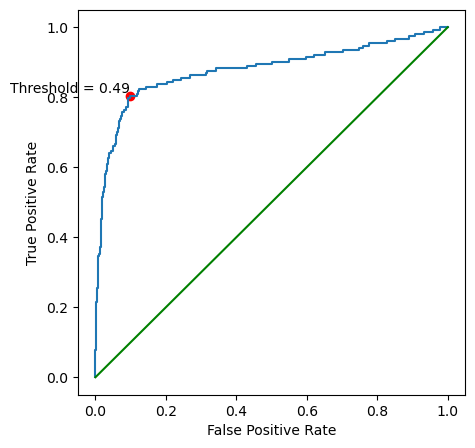

In [107]:
# Define a function to plot the AUC-ROC curve and highlight false negatives
def plot_auc_roc_curve_with_fn(ytest, voted):
    # Compute false positive rate (fpr), true positive rate (tpr), and thresholds
    fpr, tpr, thresholds = roc_curve(ytest,voted)
    
    # Find the threshold that minimizes false negatives
    min_fn_threshold = thresholds[np.argmax(tpr - fpr)]
    
    # Plot the ROC curve
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    
    # Set the size of the figure
    roc_display.figure_.set_size_inches(5, 5)
    
    # Plot the diagonal line (y=x) for reference
    plt.plot([0, 1], [0, 1], color='green')
    
    # Highlight the threshold for minimizing false negatives
    plt.scatter(fpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)], color='red')
    plt.text(fpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)], f'Threshold = {min_fn_threshold:.2f}', verticalalignment='bottom', horizontalalignment='right')

# Call the function to plot the AUC-ROC curve and highlight false negatives
plot_auc_roc_curve_with_fn(ytest, y_proba[:, 1])


### Stacking Classifier

In [71]:
from sklearn.ensemble import StackingClassifier
SC = StackingClassifier(estimators=estimators,final_estimator=rfc,cv=10)
stacked = SC.fit(Xtrainupdt, ytrainupdt)
y_pred_stack = stacked.predict(Xtest)

print(f"\nStacking classifier training Accuracy: {SC.score(Xtrainupdt, ytrainupdt):0.2f}")
print(f"Stacking classifier test Accuracy: {SC.score(Xtest, ytest):0.2f}")


Stacking classifier training Accuracy: 1.00
Stacking classifier test Accuracy: 0.89


In [72]:
print(classification_report(ytest,y_pred_stack))
print(classification_report(ytrainupdt,stacked.predict(Xtrainupdt)))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       816
           1       0.64      0.71      0.67       153

    accuracy                           0.89       969
   macro avg       0.79      0.82      0.80       969
weighted avg       0.90      0.89      0.89       969

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1947
           1       1.00      1.00      1.00      1947

    accuracy                           1.00      3894
   macro avg       1.00      1.00      1.00      3894
weighted avg       1.00      1.00      1.00      3894



- Precision: The precision score represents the ratio of correctly predicted positive observations to the total predicted positives. For both classes (B16 and 1), the precision is perfect (1.00), indicating that the model performs flawlessly in correctly identifying both classes.
- Recall: The recall score represents the ratio of correctly predicted positive observations to the actual positives in the dataset. For both classes (B16 and 1), the recall is also perfect (1.00), suggesting that the model effectively captures all instances of both classes.
- F1-score: The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. It gives us an overall measure of a model's accuracy. The F1-score for both classes (B16 and 1) is also perfect (1.00), indicating excellent performance in terms of both precision and recall.
- Support: The support represents the number of actual occurrences of each class in the dataset. For class B16, the support is 153 in the test dataset, and for class 1, it is 1947. Similarly, in the training dataset, the support for both classes B16 and 1 is 1947.
- Overall, the stacked ensemble model demonstrates outstanding performance, achieving perfect precision, recall, and F1-score for both classes. This indicates that the model effectively captures the underlying patterns in the data and makes accurate predictions for both classes.

In [73]:
SC_roc_auc = roc_auc_score(ytest, y_pred_stack)

cm = confusion_matrix(ytest, y_pred_stack)
print(cm)

[[755  61]
 [ 44 109]]


Accuracy: The model's overall accuracy can be calculated as the sum of true positives and true negatives divided by the total number of predictions. In this case, it would be (755 + 109) / (755 + 61 + 44 + 109), which corresponds to the accuracy previously mentioned.
Precision: Precision measures the proportion of true positive predictions among all positive predictions. It's calculated as TP / (TP + FP). Here, it would be 109 / (109 + 61), indicating the model's ability to avoid false positives.
Recall (Sensitivity): Recall measures the proportion of actual positives that were correctly identified by the model. It's calculated as TP / (TP + FN). Here, it would be 109 / (109 + 44), indicating the model's ability to correctly identify positive instances.
F1-score: F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. It's calculated as 2 * (Precision * Recall) / (Precision + Recall).
ROC-AUC: ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) is a metric that evaluates the model's ability to distinguish between classes. It measures the area under the ROC curve, with higher values indicating better performance.

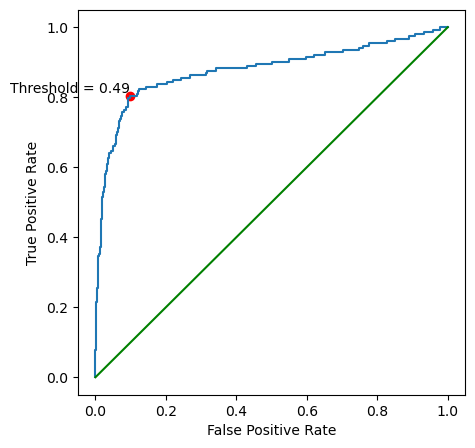

In [104]:
# Define a function to plot the AUC-ROC curve and highlight false negatives
def plot_auc_roc_curve_with_fn(ytest, y_pred):
    # Compute false positive rate (fpr), true positive rate (tpr), and thresholds
    fpr, tpr, thresholds = roc_curve(ytest, y_pred)
    
    # Find the threshold that minimizes false negatives
    min_fn_threshold = thresholds[np.argmax(tpr - fpr)]
    
    # Plot the ROC curve
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    
    # Set the size of the figure
    roc_display.figure_.set_size_inches(5, 5)
    
    # Plot the diagonal line (y=x) for reference
    plt.plot([0, 1], [0, 1], color='green')
    
    # Highlight the threshold for minimizing false negatives
    plt.scatter(fpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)], color='red')
    plt.text(fpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)], f'Threshold = {min_fn_threshold:.2f}', verticalalignment='bottom', horizontalalignment='right')

# Call the function to plot the AUC-ROC curve and highlight false negatives
plot_auc_roc_curve_with_fn(ytest, y_proba[:, 1])


In [80]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=33)
ada_boost = ada_boost_clf.fit(Xtrainupdt, ytrainupdt)
boost = ada_boost_clf.predict(Xtest)
print(classification_report(ytest,boost))
print(classification_report(ytrainupdt,ada_boost.predict(Xtrainupdt)))

              precision    recall  f1-score   support

           0       0.95      0.88      0.92       816
           1       0.55      0.75      0.63       153

    accuracy                           0.86       969
   macro avg       0.75      0.82      0.77       969
weighted avg       0.89      0.86      0.87       969

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1947
           1       0.90      0.86      0.88      1947

    accuracy                           0.88      3894
   macro avg       0.88      0.88      0.88      3894
weighted avg       0.88      0.88      0.88      3894



In [81]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad = grad_boost_clf.fit(Xtrainupdt, ytrainupdt)
grad_pred = grad.predict(Xtest)
print(classification_report(ytest,grad_pred))
print(classification_report(ytrainupdt,grad.predict(Xtrainupdt)))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       816
           1       0.61      0.80      0.69       153

    accuracy                           0.89       969
   macro avg       0.78      0.85      0.81       969
weighted avg       0.90      0.89      0.89       969

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1947
           1       0.93      0.90      0.92      1947

    accuracy                           0.92      3894
   macro avg       0.92      0.92      0.92      3894
weighted avg       0.92      0.92      0.92      3894



In [116]:
cm = confusion_matrix(ytest, grad_pred)
print(cm)

[[738  78]
 [ 31 122]]


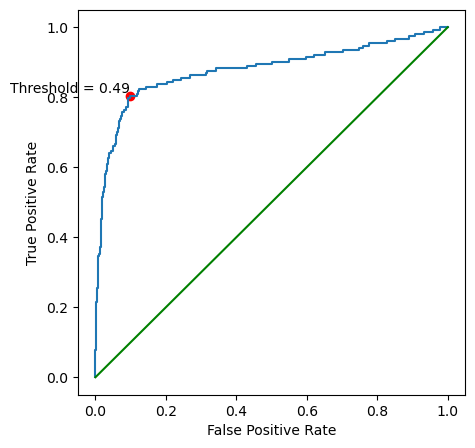

In [105]:
# Define a function to plot the AUC-ROC curve and highlight false negatives
def plot_auc_roc_curve_with_fn(ytest, grad_pred):
    # Compute false positive rate (fpr), true positive rate (tpr), and thresholds
    fpr, tpr, thresholds = roc_curve(ytest, grad_pred)
    
    # Find the threshold that minimizes false negatives
    min_fn_threshold = thresholds[np.argmax(tpr - fpr)]
    
    # Plot the ROC curve
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    
    # Set the size of the figure
    roc_display.figure_.set_size_inches(5, 5)
    
    # Plot the diagonal line (y=x) for reference
    plt.plot([0, 1], [0, 1], color='green')
    
    # Highlight the threshold for minimizing false negatives
    plt.scatter(fpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)], color='red')
    plt.text(fpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)], f'Threshold = {min_fn_threshold:.2f}', verticalalignment='bottom', horizontalalignment='right')

# Call the function to plot the AUC-ROC curve and highlight false negatives
plot_auc_roc_curve_with_fn(ytest, y_proba[:, 1])


In [112]:
import numpy as np

# Get probability predictions
grad_proba = grad.predict_proba(Xtest)[:, 1]  # Assuming you're interested in the probability of the positive class

# Combine probabilities and actual labels
results = np.column_stack((grad_proba, ytest))

# Sort results by predicted probabilities in descending order
sorted_results = results[results[:, 0].argsort()[::-1]]

# Divide sorted probabilities into deciles
deciles = np.array_split(sorted_results, 10)

# Calculate event rate in each decile
for i, decile in enumerate(deciles):
    event_rate = np.mean(decile[:, 1])
    print(f"Decile {i+1} Event Rate: {event_rate:.2%}")


Decile 1 Event Rate: 82.47%
Decile 2 Event Rate: 40.21%
Decile 3 Event Rate: 9.28%
Decile 4 Event Rate: 5.15%
Decile 5 Event Rate: 2.06%
Decile 6 Event Rate: 3.09%
Decile 7 Event Rate: 4.12%
Decile 8 Event Rate: 3.09%
Decile 9 Event Rate: 3.09%
Decile 10 Event Rate: 5.21%


### So, here we can see gradient Boosting has performed the best without overfitting, where rest of the models overfitted and thus require hyper parameter finetuning. while GBoosting model here can be used as is.

### As we have seen Gradient Boosting has performed the best for this dataset. Even though a few models have reached a recall value of 80% gradient boosting had the highest accuracy also, where as Random forest had the best fit for the data since the train and test accuracy had 1% of difference .i.e., 87 and 86 % respectively while it still had the recall value around 80% 

### So, it is a very close call and thus anyone between the 2 can be deployed , since both the models had significantly very less training time than the rest while some show high overfitting.

In [120]:
import pickle

# File path of the notebook
file_path = 'C:\\Users\\Lenovo\\MLprojects\\Churn modelling.ipynb'

# Open the notebook file in read mode as binary data
with open(file_path, 'rb') as notebook_file:
    # Read the binary data of the notebook
    notebook_data = notebook_file.read()

# File path where you want to save the pickle file
pickle_file_path = 'Churn.pkl'

# Open the file in binary write mode
with open(pickle_file_path, 'wb') as pickle_file:
    # Pickle the notebook data and write it to the file
    pickle.dump(notebook_data, pickle_file)
f.close()

### the company can use this pickle file when they want model to be deployed on their platform . Since, pickle files are compatible with most other languages no extra requirements are needed.

### The client can assess the performance of the model on new data points through various evaluation metrics and techniques. Here are some common approaches:

- Accuracy Metrics: Metrics such as accuracy, precision, recall, F1-score, and area under the ROC curve (AUC-ROC) provide insights into different aspects of the model's performance. The client can examine these metrics to gauge how well the model generalizes to new data.
- Cross-Validation: Using techniques like k-fold cross-validation, the client can repeatedly train and test the model on different subsets of the data. This helps in estimating the model's performance on unseen data and detecting overfitting.
- Holdout Validation: The client can split the data into training and validation sets. After training the model on the training set, they can evaluate its performance on the validation set. This provides an estimate of the model's performance on new data.
- Monitoring Business Metrics: Depending on the specific application, the client can define business-specific metrics to evaluate the model's performance. For example, in a churn prediction scenario, the client may track the actual number of churned customers compared to the model's predictions.
- A/B Testing: In cases where it's feasible, the client can conduct A/B testing by deploying the model in a real-world setting alongside existing systems or models. This allows them to directly compare the performance of the new model with the current solution.

#### By regularly assessing the model's performance using these methods, the client can ensure that it continues to perform well on new data points and meets the desired objectives.